#### Import libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report,ConfusionMatrixDisplay, precision_score, recall_score, f1_score

#### Load the Dataset

In [2]:
import pandas as pd
df=pd.read_csv('secondary_data.csv')
df

,S,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,p,1.18,s,s,y,f,f,f,f,3.93,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61065,p,1.27,f,s,y,f,f,f,f,3.18,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61066,p,1.27,s,s,y,f,f,f,f,3.86,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u
61067,p,1.24,f,s,y,f,f,f,f,3.56,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u


In [3]:
df_info = df.info()
print(df_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S                     61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

In [4]:
df.shape

(61069, 21)

In [5]:
df['S'].value_counts()

S
p    33888
e    27181
Name: count, dtype: int64

In [6]:
df.isna().sum()

S                           0
cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-type               57892
veil-color              53656
has-ring                    0
ring-type                2471
spore-print-color       54715
habitat                     0
season                      0
dtype: int64

# Pre-processing **Data**

#### print outliers


In [7]:
# Identify columns with numerical data types
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns


for column in numerical_columns:
  # Calculate the interquartile range (IQR)
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1

  # Define the lower and upper bounds for outliers
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # Find the outliers
  outliers = df[~((df[column] >= lower_bound) & (df[column] <= upper_bound))]

  # Print the outliers
  print(f"Outliers for column '{column}':")
  print(outliers[column])


Outliers for column 'cap-diameter':
1        16.60
12       17.37
13       16.56
17       17.40
18       16.16
         ...  
58946    20.42
58947    24.19
58948    16.82
58949    22.71
58950    19.74
Name: cap-diameter, Length: 2400, dtype: float64
Outliers for column 'stem-height':
0        16.95
1        17.99
2        17.80
3        15.77
4        16.53
         ...  
52223    13.81
52227    12.79
52232    12.45
52233    12.92
52240    14.40
Name: stem-height, Length: 3169, dtype: float64
Outliers for column 'stem-width':
17310    33.87
17311    35.18
17331    34.60
17339    36.44
17342    34.87
         ...  
59578    35.51
59591    37.62
59618    35.07
59619    34.43
59646    34.66
Name: stem-width, Length: 1967, dtype: float64


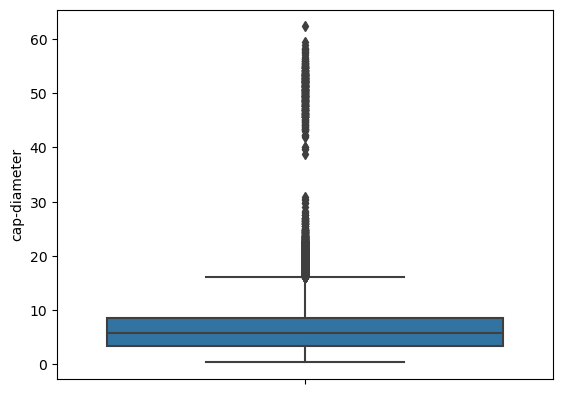

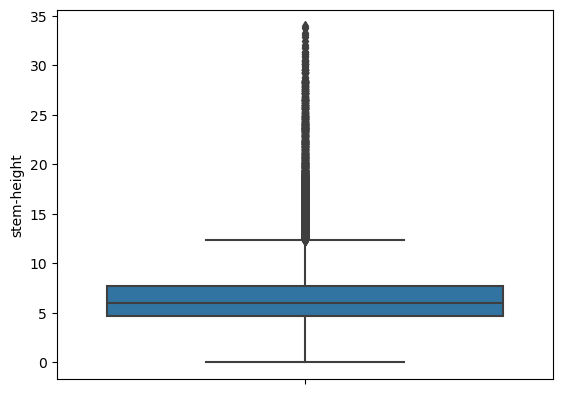

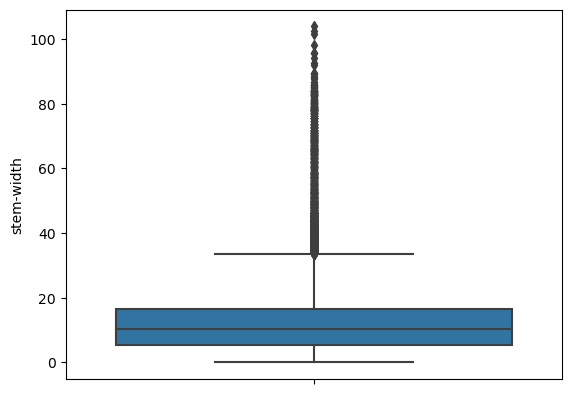

In [8]:
# Select only numeric columns
num_cols = df.select_dtypes(include=['float64', 'int64'])


# Create a boxplot for each column in the DataFrame
for cols in num_cols:
    sns.boxplot(y=num_cols[cols])
    plt.show()

In [9]:
#  sum of outliers

count = 0
for col in numerical_columns:
  # Calculate the interquartile range (IQR)
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1

  # Define the lower and upper bounds for outliers
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # Find the outliers
  outliers = df[~((df[col] >= lower_bound) & (df[col] <= upper_bound))]

  # Count the outliers
  count += len(outliers)

print(f"Total number of outliers: {count}")


Total number of outliers: 7536


In [10]:
# filtering outliers

# Remove outliers
for col in numerical_columns:
  # Calculate the interquartile range (IQR)
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1

  # Define the lower and upper bounds for outliers
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # Find the outliers
  outliers = df[~((df[col] >= lower_bound) & (df[col] <= upper_bound))]

  # Remove the outliers
  df = df.drop(outliers.index)

# Print the new shape of the DataFrame
print(df.shape)


(53900, 21)


In [11]:
#Number and proportion of outliers filtered

# Number of outliers removed
outliers_removed = count

# Proportion of outliers removed
proportion_outliers_removed = outliers_removed / df.shape[0]

print(f"Number of outliers removed: {outliers_removed}")
print(f"Proportion of outliers removed: {proportion_outliers_removed:.2%}")


Number of outliers removed: 7536
Proportion of outliers removed: 13.98%


#### Duplicates

In [12]:
dimension = df.shape

new_df = df.drop_duplicates()
dimension_after = new_df.shape
removed = dimension[0] - dimension_after[0]
prop = removed / dimension[0]
df = new_df
print("Number of Duplicate Records Removed:", removed)
print("Proportion of Duplicate Records Removed:", prop)


Number of Duplicate Records Removed: 2
Proportion of Duplicate Records Removed: 3.7105751391465674e-05


#### Removing Missing **values**

In [13]:
df.isna().sum()

S                           0
cap-diameter                0
cap-shape                   0
cap-surface             13688
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          8688
gill-spacing            21196
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               47438
stem-surface            34780
stem-color                  0
veil-type               51622
veil-color              47427
has-ring                    0
ring-type                2325
spore-print-color       48776
habitat                     0
season                      0
dtype: int64

In [14]:
cols = ['stem-root', 'stem-surface', 'veil-type', 'spore-print-color', 'cap-surface', 'ring-type', 'spore-print-color', 'veil-color', 'gill-attachment', 'gill-spacing']

for col in cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [15]:
df.isna().sum()

S                       0
cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-height             0
stem-width              0
stem-root               0
stem-surface            0
stem-color              0
veil-type               0
veil-color              0
has-ring                0
ring-type               0
spore-print-color       0
habitat                 0
season                  0
dtype: int64

In [16]:
df.dtypes

S                        object
cap-diameter            float64
cap-shape                object
cap-surface              object
cap-color                object
does-bruise-or-bleed     object
gill-attachment          object
gill-spacing             object
gill-color               object
stem-height             float64
stem-width              float64
stem-root                object
stem-surface             object
stem-color               object
veil-type                object
veil-color               object
has-ring                 object
ring-type                object
spore-print-color        object
habitat                  object
season                   object
dtype: object

In [17]:
# Label Encoding for handling data
col=['S','cap-shape','cap-surface','cap-color','does-bruise-or-bleed','gill-attachment','gill-spacing','gill-color','stem-root','stem-surface','stem-color','veil-type','veil-color','has-ring','ring-type','spore-print-color','habitat','season']
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in col:
  df[i]=le.fit_transform(df[i])


In [18]:
df.dtypes

S                         int64
cap-diameter            float64
cap-shape                 int64
cap-surface               int64
cap-color                 int64
does-bruise-or-bleed      int64
gill-attachment           int64
gill-spacing              int64
gill-color                int64
stem-height             float64
stem-width              float64
stem-root                 int64
stem-surface              int64
stem-color                int64
veil-type                 int64
veil-color                int64
has-ring                  int64
ring-type                 int64
spore-print-color         int64
habitat                   int64
season                    int64
dtype: object

In [19]:
df

,S,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
353,1,6.87,6,2,5,0,2,0,10,6.88,...,0,6,10,0,4,1,4,1,0,0
354,1,8.59,4,2,5,0,2,0,10,9.15,...,0,6,10,0,4,1,4,1,0,0
355,1,5.95,4,2,5,0,2,0,10,7.54,...,0,6,10,0,4,1,4,1,0,2
356,1,6.51,6,2,5,0,2,0,10,6.80,...,0,6,10,0,4,1,4,1,0,0
357,1,7.66,6,2,5,0,2,0,10,8.55,...,0,6,10,0,4,1,4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,1,1.18,5,7,11,0,3,2,2,3.93,...,0,4,11,0,4,0,1,1,0,0
61065,1,1.27,2,7,11,0,3,2,2,3.18,...,0,4,11,0,4,0,1,1,0,0
61066,1,1.27,5,7,11,0,3,2,2,3.86,...,0,4,11,0,4,0,1,1,0,2
61067,1,1.24,2,7,11,0,3,2,2,3.56,...,0,4,11,0,4,0,1,1,0,2


In [20]:
df['S'].value_counts()

S
1    29688
0    24210
Name: count, dtype: int64

In [21]:
#  dimensionality reduction based on pca


# Standardize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

# Perform PCA
pca = PCA(n_components=0.95)
reduced_data = pca.fit_transform(scaled_data)

# Print the shape of the reduced data
print(reduced_data.shape)


(53898, 15)


/Users/linuanil/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


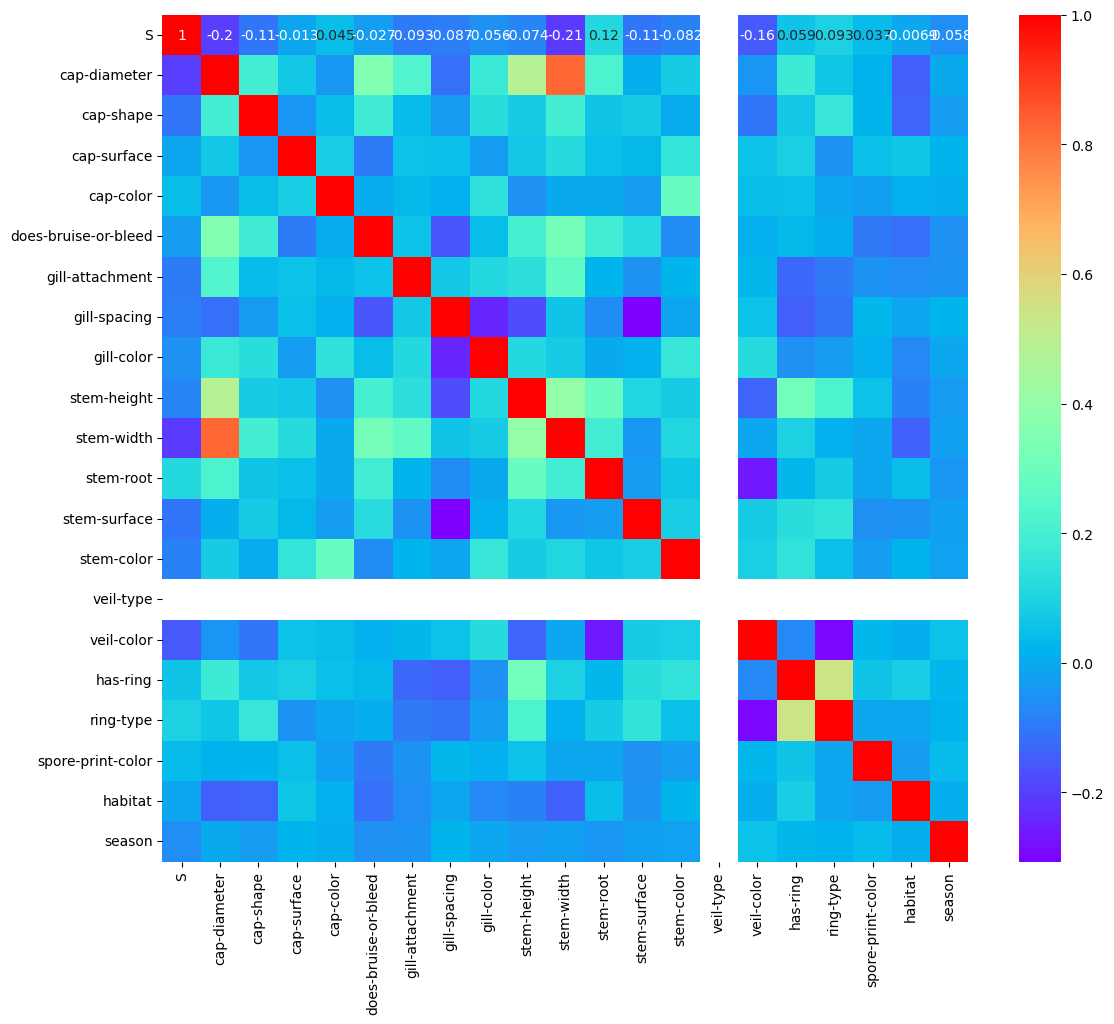

In [22]:
#Finding the correlation using heat map
corr=df.corr()
plt.figure(figsize=(13,11))
#annot=True: This parameter is used to annotate each cell of the heatmap
#with the numeric value.
sns.heatmap(corr,annot=True,cmap='rainbow')
print()
print()
plt.show()

In [27]:
df.to_csv('Mushroom_Python_Preprocess.csv', index=False)  # Set index=False to avoid saving row indices


# Seperating X and **Y**

In [28]:
X=df.drop(['S'],axis=1)
X

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
353,6.87,6,2,5,0,2,0,10,6.88,13.64,0,6,10,0,4,1,4,1,0,0
354,8.59,4,2,5,0,2,0,10,9.15,17.34,0,6,10,0,4,1,4,1,0,0
355,5.95,4,2,5,0,2,0,10,7.54,12.73,0,6,10,0,4,1,4,1,0,2
356,6.51,6,2,5,0,2,0,10,6.80,12.92,0,6,10,0,4,1,4,1,0,0
357,7.66,6,2,5,0,2,0,10,8.55,14.98,0,6,10,0,4,1,4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,1.18,5,7,11,0,3,2,2,3.93,6.22,0,4,11,0,4,0,1,1,0,0
61065,1.27,2,7,11,0,3,2,2,3.18,5.43,0,4,11,0,4,0,1,1,0,0
61066,1.27,5,7,11,0,3,2,2,3.86,6.37,0,4,11,0,4,0,1,1,0,2
61067,1.24,2,7,11,0,3,2,2,3.56,5.44,0,4,11,0,4,0,1,1,0,2


In [29]:
y=df.iloc[:,0]
y

353      1
354      1
355      1
356      1
357      1
        ..
61064    1
61065    1
61066    1
61067    1
61068    1
Name: S, Length: 53898, dtype: int64

In [30]:
#Initialize the MinMaxScaler object
scaler=MinMaxScaler()
#Fit and transform fetures value
X_scaled=scaler.fit_transform(X)
X_scaled


array([[0.41232529, 1.        , 0.2       , ..., 0.16666667, 0.        ,
        0.        ],
       [0.52160102, 0.66666667, 0.2       , ..., 0.16666667, 0.        ,
        0.        ],
       [0.35387548, 0.66666667, 0.2       , ..., 0.16666667, 0.        ,
        0.66666667],
       ...,
       [0.05654384, 0.83333333, 0.7       , ..., 0.16666667, 0.        ,
        0.66666667],
       [0.05463787, 0.33333333, 0.7       , ..., 0.16666667, 0.        ,
        0.66666667],
       [0.0501906 , 0.83333333, 0.7       , ..., 0.16666667, 0.        ,
        0.66666667]])

Spliting the data

In [31]:
#Split df at 70-30 ratio
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=1)

In [32]:
#check the shape of X_os_train,X_os_test,y_os_train and y_os_test
print('X_train:',X_train.shape)
print('X_test:',X_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

X_train: (37728, 20)
X_test: (16170, 20)
y_train: (37728,)
y_test: (16170,)


# Model Building using Random **Forest**

In [33]:
#create each models object
from sklearn.ensemble import RandomForestClassifier
r_forest=RandomForestClassifier(n_estimators=42,random_state=42,max_depth=5,min_samples_leaf=5)
r_forest.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=5, n_estimators=42,
                       random_state=42)

In [34]:
y_pred=r_forest.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [35]:
precision = precision_score(y_test, y_pred, average='weighted')
recall= recall_score(y_test, y_pred, average='weighted')
f1= f1_score(y_test, y_pred, average='weighted')
print("Precision:", round(precision, 3))
print("Recall:", round(recall, 3))
print("F1-Score:", round(f1, 3))
print(classification_report(y_test,y_pred))


Precision: 0.8
Recall: 0.798
F1-Score: 0.799
              precision    recall  f1-score   support

           0       0.76      0.80      0.78      7191
           1       0.83      0.79      0.81      8979

    accuracy                           0.80     16170
   macro avg       0.80      0.80      0.80     16170
weighted avg       0.80      0.80      0.80     16170



In [36]:
from sklearn.ensemble import GradientBoostingClassifier
g_boost=GradientBoostingClassifier(n_estimators=100,random_state=42)
g_boost.fit(X_train,y_train)

GradientBoostingClassifier(random_state=42)

In [37]:
y_pred_i=g_boost.predict(X_test)
y_pred_i

array([1, 1, 0, ..., 1, 0, 1])

In [38]:
precision = precision_score(y_test, y_pred_i, average='weighted')
recall= recall_score(y_test, y_pred_i, average='weighted')
f1= f1_score(y_test, y_pred_i, average='weighted')
print("Precision:", round(precision, 3))
print("Recall:", round(recall, 3))
print("F1-Score:", round(f1, 3))
print(classification_report(y_test,y_pred_i))

Precision: 0.933
Recall: 0.933
F1-Score: 0.933
              precision    recall  f1-score   support

           0       0.93      0.92      0.92      7191
           1       0.94      0.94      0.94      8979

    accuracy                           0.93     16170
   macro avg       0.93      0.93      0.93     16170
weighted avg       0.93      0.93      0.93     16170

